<a href="https://colab.research.google.com/github/Advanced-Research-Centre/QASM/blob/main/Algorithmic%20Hamiltonian%20Complexity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
%%capture
!pip install pybdm
!pip install qiskit

In [178]:
import numpy as np
import scipy as sp
from pybdm import BDM
import qiskit
import matplotlib.pyplot as plt
%matplotlib inline
from qiskit.visualization import plot_bloch_multivector
from qiskit import QuantumCircuit, execute, transpile
import qiskit.quantum_info as qi
import random

In [179]:
def show_figure(fig):
    # See https://github.com/Qiskit/qiskit-terra/issues/1682
    new_fig = plt.figure()
    new_mngr = new_fig.canvas.manager
    new_mngr.canvas.figure = fig
    fig.set_canvas(new_mngr.canvas)
    plt.show(fig)

def plot_U_0(U):
  qc = QuantumCircuit(1)
  qc.unitary(U, [0])
  sv = qi.Statevector.from_instruction(qc)
  show_figure(plot_bloch_multivector(sv, title=""))

In [181]:
# Works for matrices being real, negative, complex.

def H2U(H,t,precision=8):
  r = np.pi*t
  U = np.round(sp.linalg.expm(r*H*1j),precision)
  return U

def U_bdm(U,width=8,frac=4):
  Ur = U.real
  Ui = U.imag
  Ur_quantized = np.round(Ur*(2**frac)).astype(int)
  Ur_bin = np.vectorize(np.binary_repr)(Ur_quantized,width)
  Ui_quantized = np.round(Ui*(2**frac)).astype(int)
  Ui_bin = np.vectorize(np.binary_repr)(Ui_quantized,width)
  U_bin = np.array(list(''.join(list(np.concatenate((np.ndarray.flatten(Ur_bin),np.ndarray.flatten(Ui_bin)))))),dtype=int)
  bdm1d = BDM(ndim=1)
  return bdm1d.bdm(U_bin)

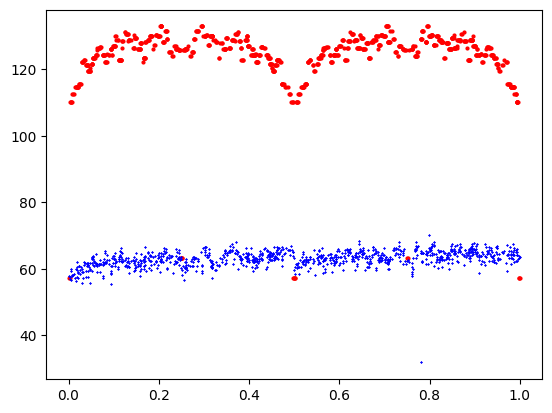

In [183]:
H = np.array([[-1,1], [1,-1]])
trials = 1000
data = []
for i in range(0,trials):
  t = random.random()
  bdm1d = BDM(ndim=1)
  t_bdm = bdm1d.bdm(np.array(list(np.binary_repr(int(t*(2**18)),24)),dtype=int))
  data.append((t,U_bdm(H2U(H,t),12,6),t_bdm))

xs = [x[0] for x in data]
y1s = [x[1] for x in data]
y2s = [x[2] for x in data]
plt.plot(xs, y1s, 'ro', markersize=2)
plt.plot(xs, y2s, 'bx', markersize=1)
plt.show()

In [ ]:
# Plans:
# BDM works for reals in 0, 1. Use this?
# Ising Model = MaxCut problem
# Heisenberg XXX model Hamiltonians from https://github.com/qiskit-community/open-science-prize-2021/blob/main/ibmq-qsim-sup-mat.ipynb

Ignore codes below --------------

In [ ]:
H = np.array([[-1,1], [1,-1]])
t = 1
r = np.pi*t
U = np.round(sp.linalg.expm(r*H*1j),8)
print(U)

In [ ]:
# Failed method (for fractions/complex)

U2 = np.kron(U,np.eye(2)) # since
print(U2)

U2_bin = np.array(U2 , dtype = int)
bdm2d = BDM(ndim=2)
print("BDM =",bdm2d.bdm(U2_bin))

[[0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]]
BDM = 26.415903926263844


<ipython-input-83-844ce37bbaa3>:6: ComplexWarning: Casting complex values to real discards the imaginary part
  U2_bin = np.array(U2 , dtype = int)


In [ ]:
# Failed method

U2r = U2.real
U2i = U2.imag
print(U2r, U2i)

f = 4 # fraction width

U2r_quantized = np.round(U2r*(2**f)).astype(int)
U2r_bin = np.vectorize(np.binary_repr)(U2r_quantized).astype(int)
print(U2r_bin)

U2i_quantized = np.round(U2i*(2**f)).astype(int)
U2i_bin = np.vectorize(np.binary_repr)(U2i_quantized).astype(int)
print(U2i_bin)

U2_bin = np.concatenate((np.ndarray.flatten(U2r_bin),np.ndarray.flatten(U2i_bin)))

print(U2_bin)

bdm1d = BDM(ndim=1)
print("BDM =",bdm1d.bdm(U2_bin))